In [ ]:
# Library yang digunakan
from sklearn.datasets import load_breast_cancer
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
# Transform ke pandas Data Frame 
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = ['malignant' if target == 0 else 'benign' for target in data.target] # Tambahkan column target

# Tampilkan 5 data teratas
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [ ]:
# Pisahkan data masing - masing target
malignant = df[df['target'] == 'malignant']
benign = df[df['target'] == 'benign']

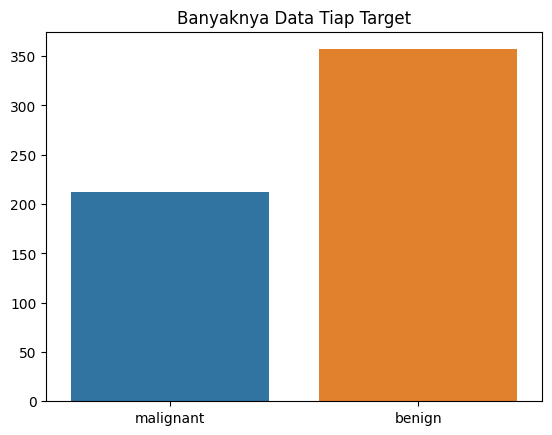

In [ ]:
# Visualize banyaknya data tiap target
sns.barplot(x = ['malignant', 'benign'], y = [len(malignant), len(benign)])

plt.title('Banyaknya Data Tiap Target')
plt.show()

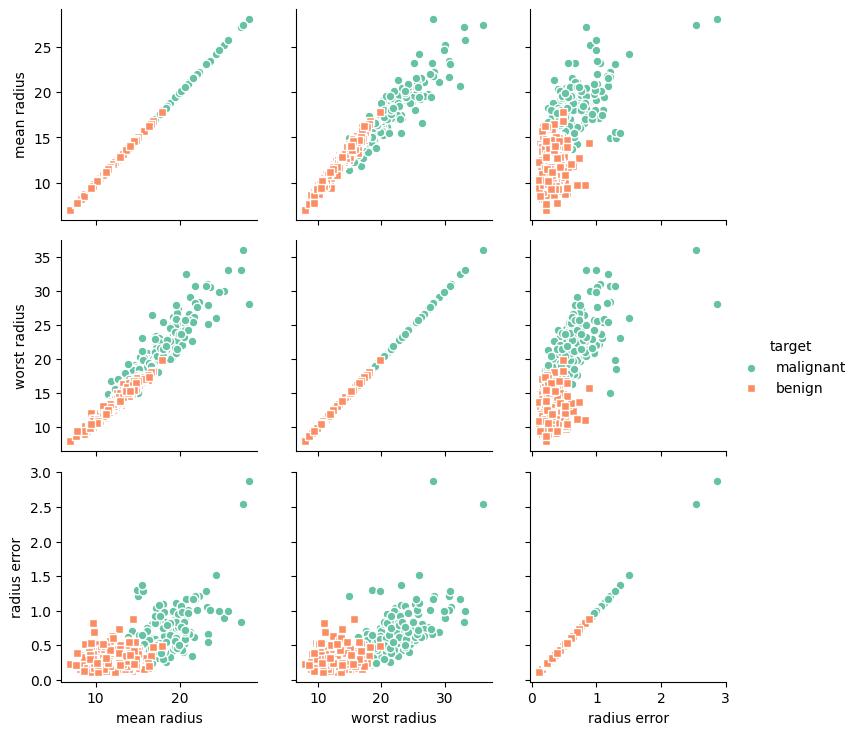

In [ ]:
g = sns.PairGrid(df[['mean radius', 'worst radius', 'radius error', 'target']], hue="target", palette="Set2", hue_kws={"marker": ["o", "s"]})
g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()

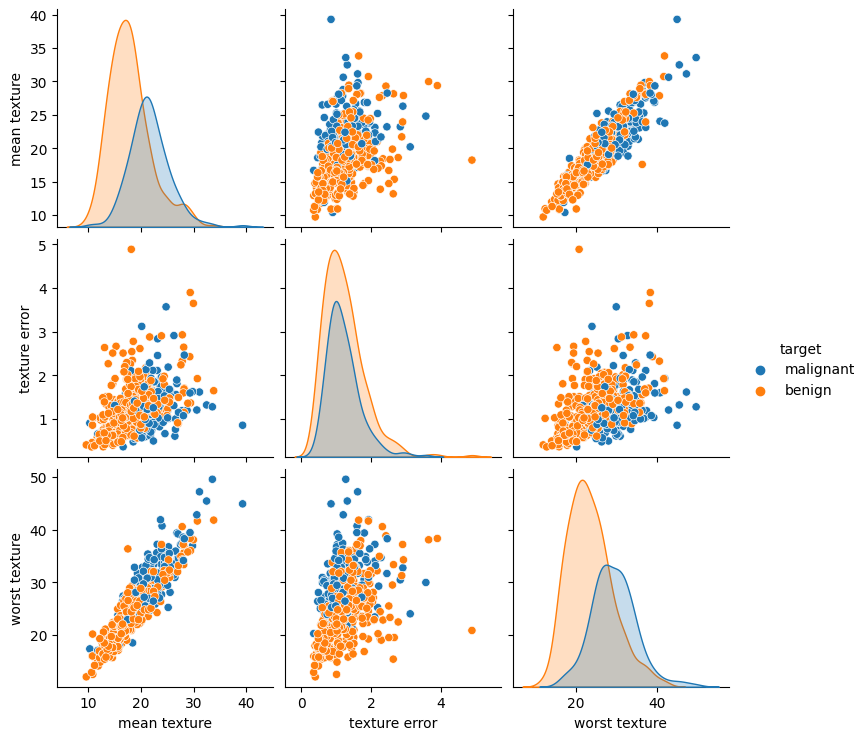

In [ ]:
sns.pairplot(df[['mean texture', 'texture error', 'worst texture', 'target']], hue='target')

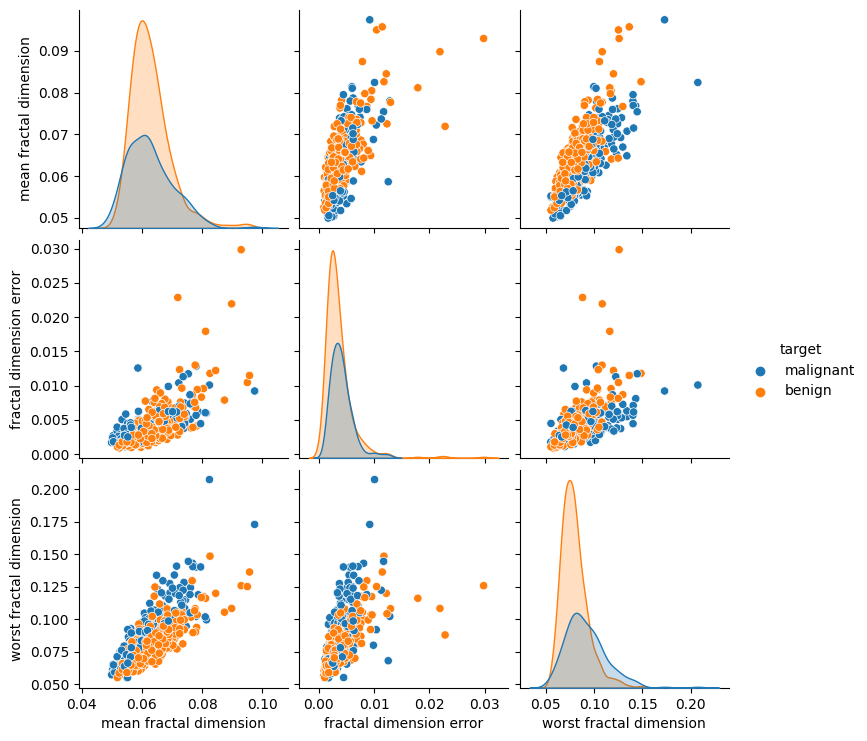

In [ ]:
sns.pairplot(df[['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension', 'target']], hue='target')

In [ ]:
mean_column = list(df.columns[0:10])

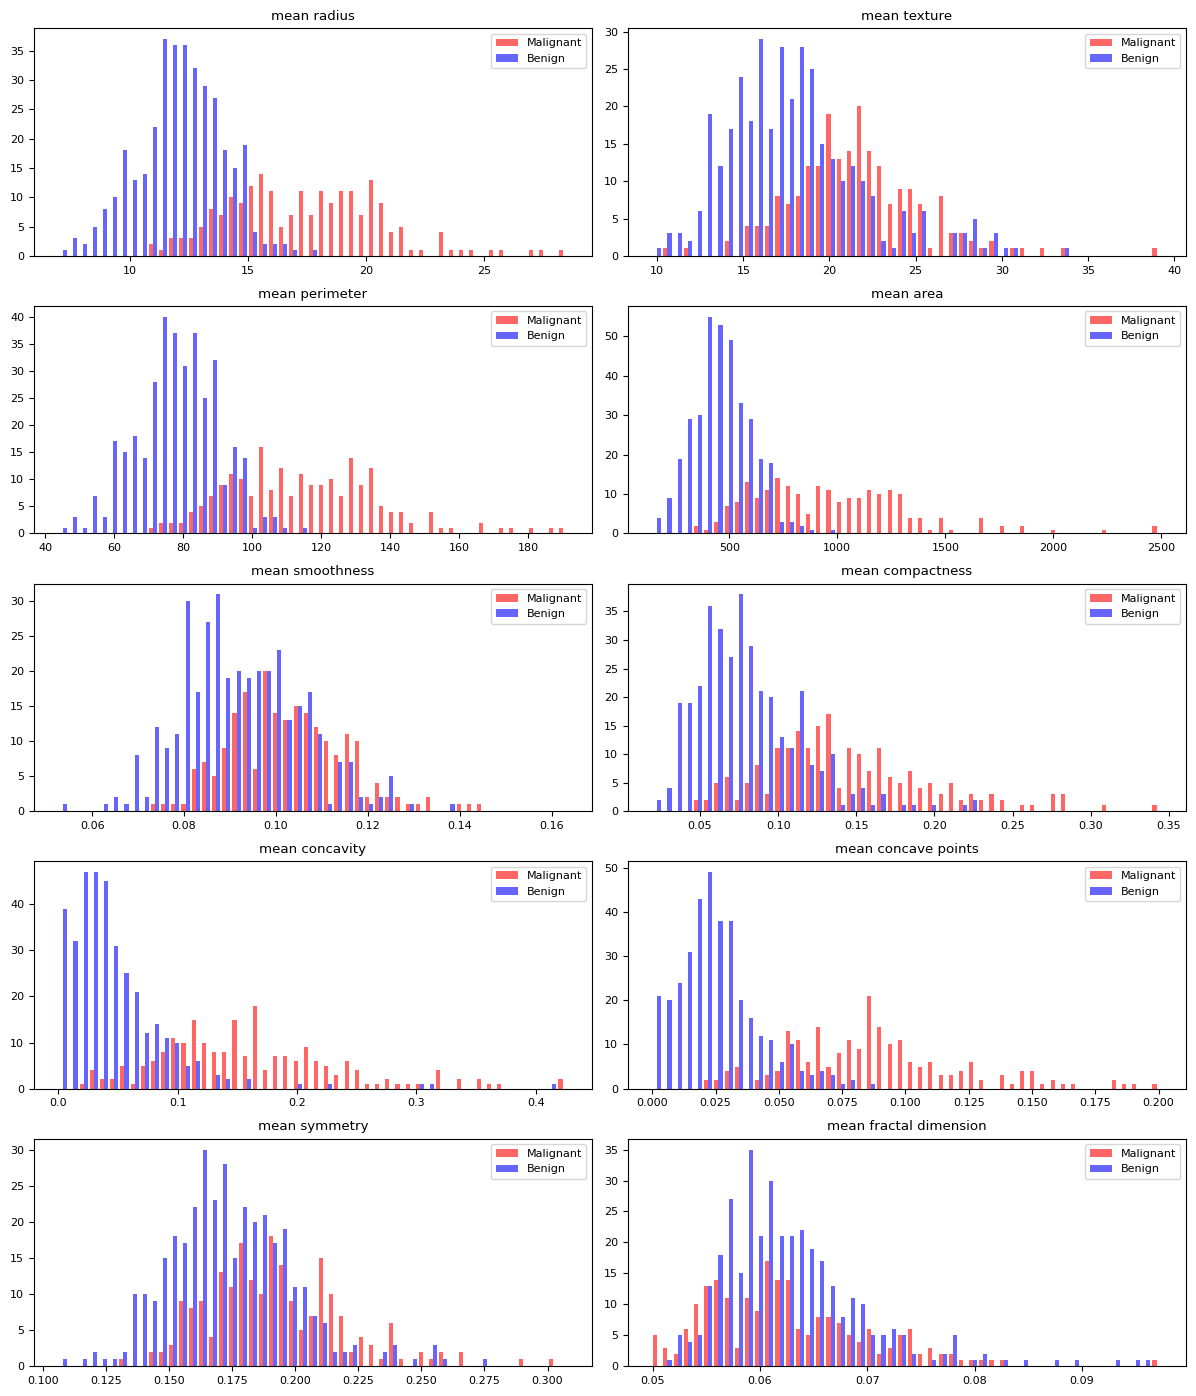

In [ ]:
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows=5, ncols=2, figsize=(12,14))
graphs = graphs.flatten()

for idx, graph in enumerate(graphs):
    graph.figure
      
    binwidth= (max(df[mean_column[idx]]) - min(df[mean_column[idx]]))/50
    bins = np.arange(min(df[mean_column[idx]]), max(df[mean_column[idx]]) + binwidth, binwidth)
    graph.hist([malignant[mean_column[idx]], benign[mean_column[idx]]], bins=bins, alpha=0.6, label=['Malignant','Benign'], color=['red','blue'])
    graph.legend(loc='upper right')
    graph.set_title(mean_column[idx])
plt.tight_layout()

In [ ]:
error_column = list(df.columns[10:20])

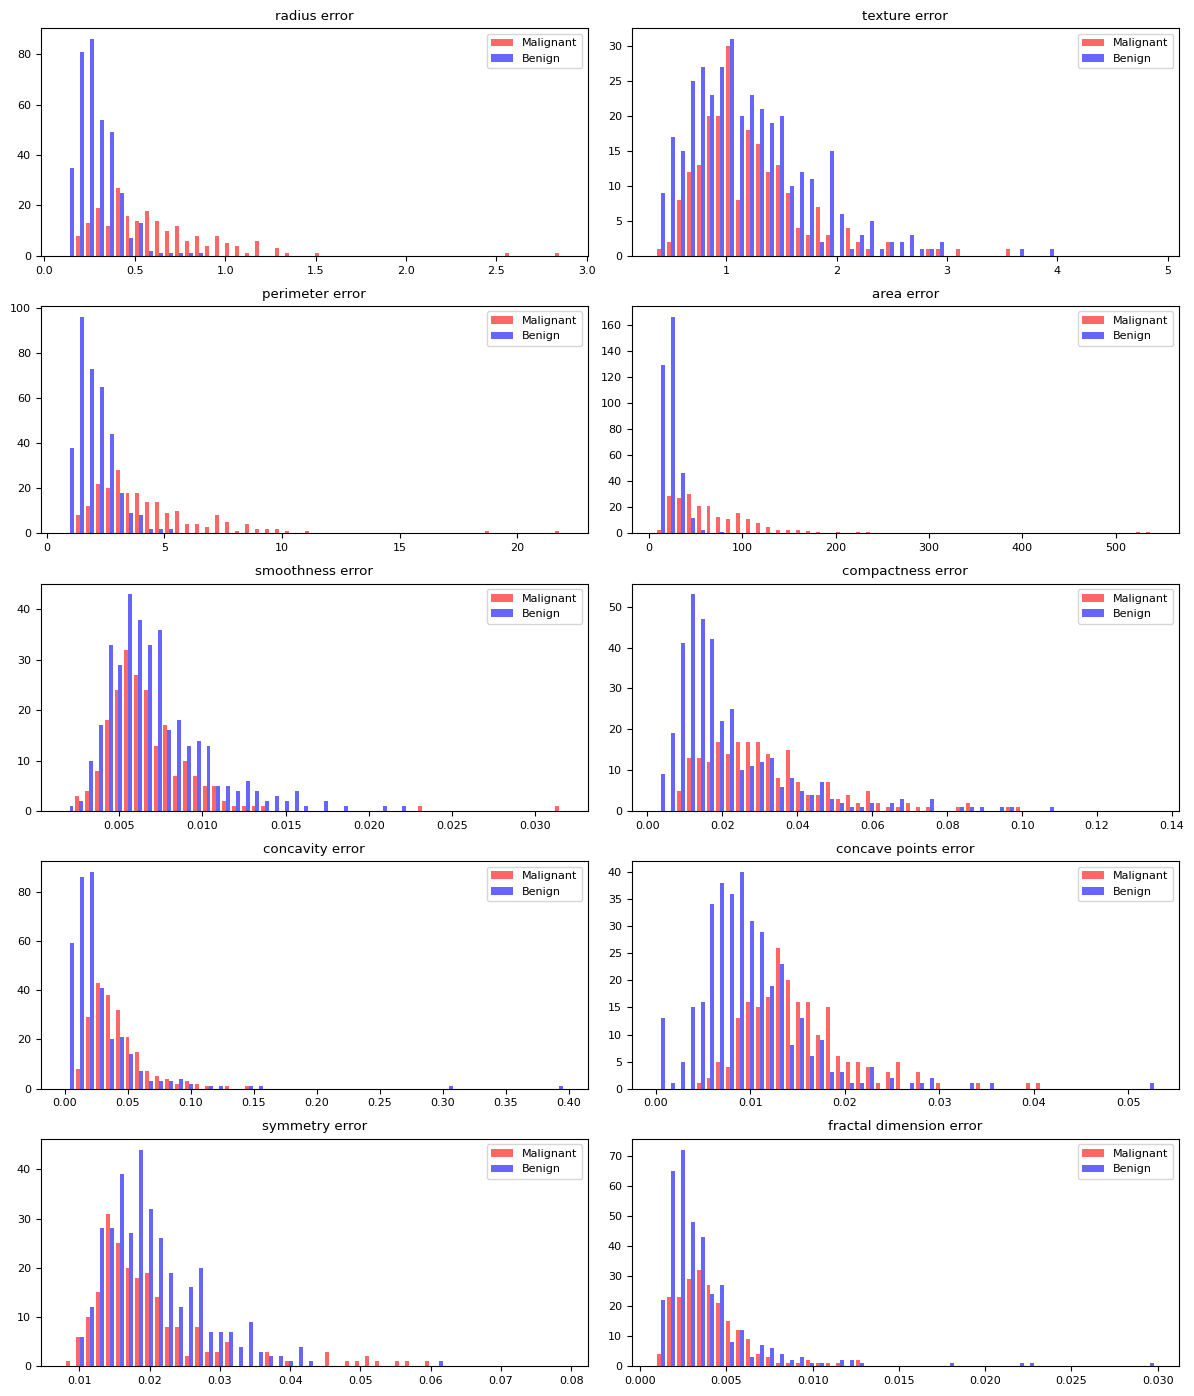

In [ ]:
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows=5, ncols=2, figsize=(12,14))
graphs = graphs.flatten()

for idx, graph in enumerate(graphs):
    graph.figure
      
    binwidth= (max(df[error_column[idx]]) - min(df[error_column[idx]]))/50
    bins = np.arange(min(df[error_column[idx]]), max(df[error_column[idx]]) + binwidth, binwidth)
    graph.hist([malignant[error_column[idx]], benign[error_column[idx]]], bins=bins, alpha=0.6, label=['Malignant','Benign'], color=['red','blue'])
    graph.legend(loc='upper right')
    graph.set_title(error_column[idx])
plt.tight_layout()

In [ ]:
worst_column = list(df.columns[20:30])

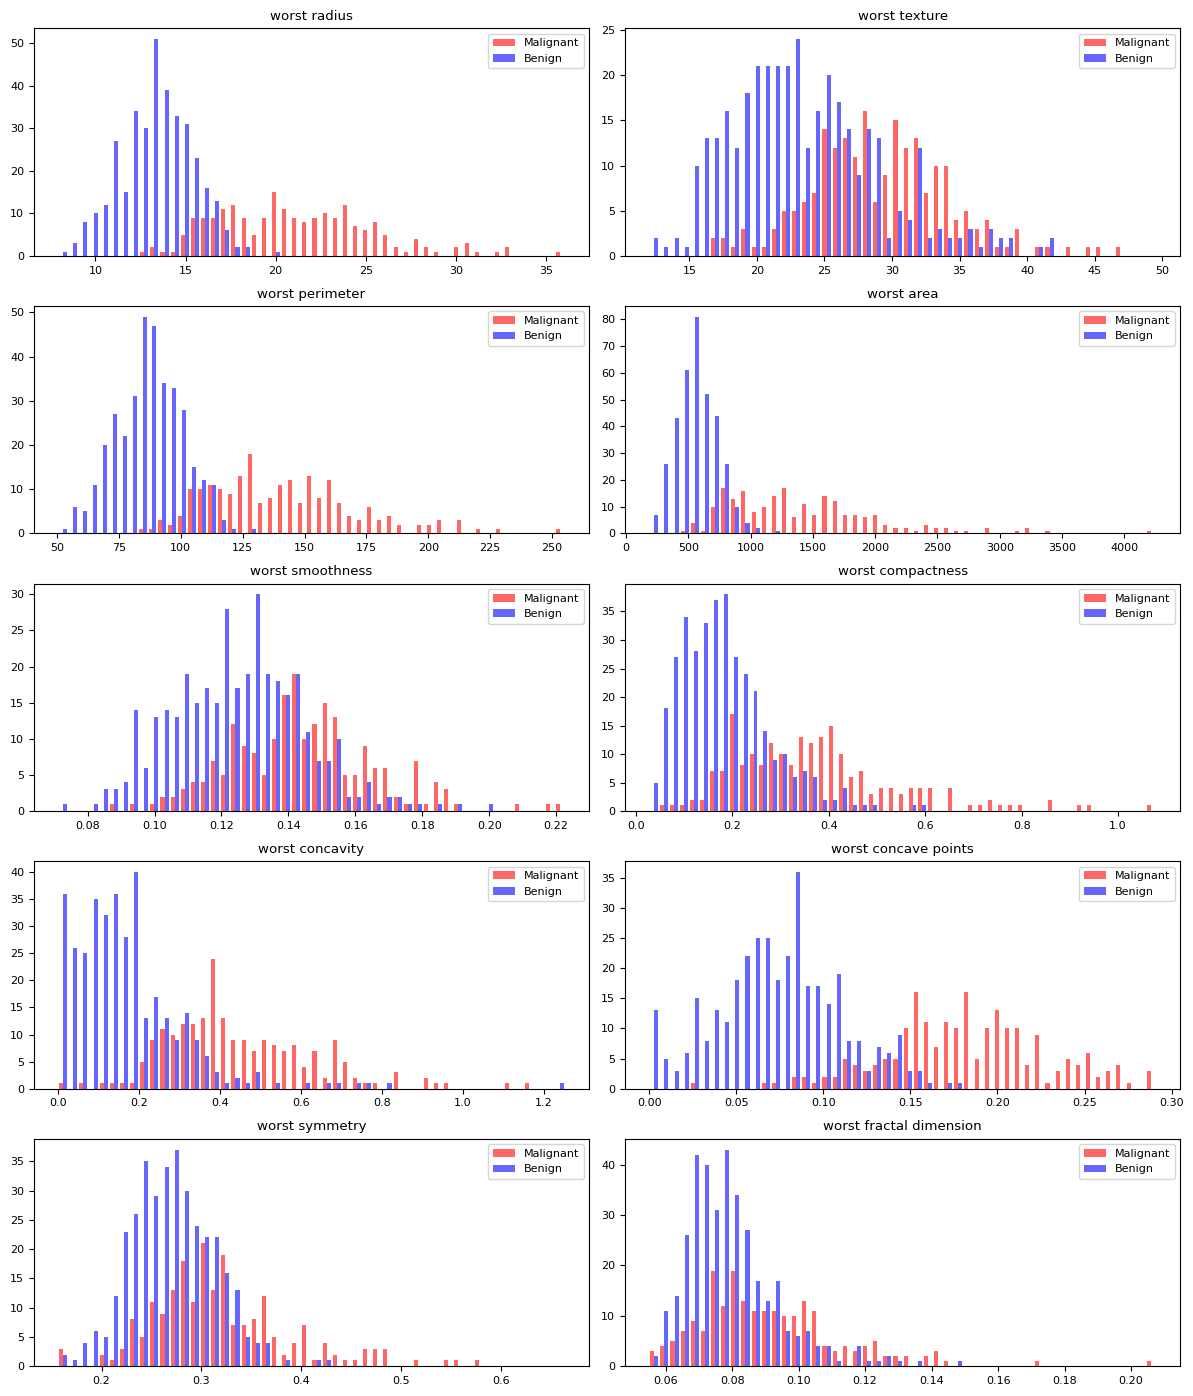

In [ ]:
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows=5, ncols=2, figsize=(12,14))
graphs = graphs.flatten()

for idx, graph in enumerate(graphs):
    graph.figure
      
    binwidth= (max(df[worst_column[idx]]) - min(df[worst_column[idx]]))/50
    bins = np.arange(min(df[worst_column[idx]]), max(df[worst_column[idx]]) + binwidth, binwidth)
    graph.hist([malignant[worst_column[idx]], benign[worst_column[idx]]], bins=bins, alpha=0.6, label=['Malignant','Benign'], color=['red','blue'])
    graph.legend(loc='upper right')
    graph.set_title(worst_column[idx])
plt.tight_layout()

In [ ]:
# Pisahkan features dengan targets
x = df.iloc[:, 0:30] # features
y = df.iloc[:, -1] # targets

In [ ]:
# Split data dengan ketentuan 60% train 40% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

[Text(0.5, 0.8333333333333334, 'x[22] <= 106.1\ngini = 0.467\nsamples = 341\nvalue = [214, 127]'),
 Text(0.25, 0.5, 'x[27] <= 0.134\ngini = 0.099\nsamples = 210\nvalue = [199, 11]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.02\nsamples = 196\nvalue = [194, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.75, 0.5, 'x[7] <= 0.056\ngini = 0.203\nsamples = 131\nvalue = [15, 116]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.499\nsamples = 27\nvalue = [13, 14]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.038\nsamples = 104\nvalue = [2, 102]')]

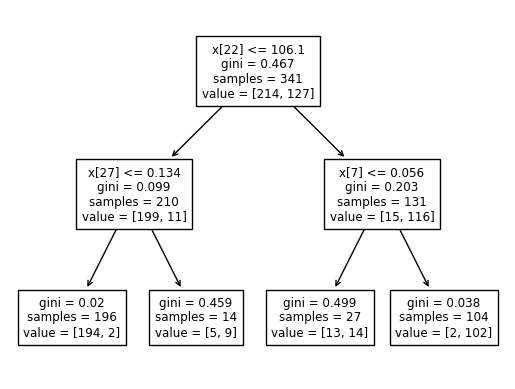

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 0, max_depth = 2) # max_depth 2 paling optimal dari 3, 5, dan default
decision_tree = decision_tree.fit(x_train, y_train) # train dtree
tree.plot_tree(decision_tree) # plot dtree

In [ ]:
# Hitung score akurasi
score = decision_tree.score(x_test, y_test)
print('Akurasi :',score)

Akurasi : 0.8991228070175439


In [ ]:
random_forest = RandomForestClassifier(random_state = 0, max_depth = 4) # Optimal di max_depth 4 
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [ ]:
# Hitung score akurasi
score = random_forest.score(x_test, y_test)
print('Akurasi :',score)

Akurasi : 0.9429824561403509


In [ ]:
svc = DecisionTreeClassifier(random_state = 0, max_depth = 2)
self_training = SelfTrainingClassifier(svc)
self_training.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SelfTrainingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                             random_state=0))

In [ ]:
svc = DecisionTreeClassifier(random_state = 0, max_depth = 2)
self_training = SelfTrainingClassifier(svc)
self_training.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SelfTrainingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                             random_state=0))